# Identifying objects in images.
## 1st dataset to try: CIFAR 10

Starting lines and imports

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

%load_ext autoreload
%autoreload 2

In [2]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print("CUDA is not available. Using CPU.")
else:
    print("CUDA is available. Using GPU.")

CUDA is not available. Using CPU.


## Load CIFAR 10

#### Define transforms for the dataset and load

In [3]:
transform_tr = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))])
transform_tst = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4942, 0.4851, 0.4504),(0.2467, 0.2429, 0.2616))])

In [6]:
i = 10
sampler = torch.utils.data.SubsetRandomSampler(list(range(0*train_batch_size, (i)*train_batch_size)))

In [101]:
# CIFAR-10 training dataset and data loader
train_batch_size = 256
val_batch_size = 5000

indices = np.arange(50000)
np.random.shuffle(indices)

tr_sampler = torch.utils.data.SubsetRandomSampler(indices[:45000])
val_sampler = torch.utils.data.SubsetRandomSampler(indices[45000:50000])

train_dataset = datasets.CIFAR10('CIFAR10',
                                 train=True, 
                                 download=True, 
                                 transform=transform_tr)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=train_batch_size,
                                          shuffle=False,
                                          sampler=tr_sampler)
val_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=val_batch_size,
                                          shuffle=False,
                                          sampler=val_sampler)

Files already downloaded and verified


In [46]:
# CIFAR-10 test dataset and data loader
test_batch_size = 10000

test_dataset = datasets.CIFAR10('CIFAR10', 
                                train=False, 
                                download=True, 
                                transform=transform_tst)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=test_batch_size,
                                          shuffle=True)

Files already downloaded and verified


In [47]:
# num of batches in each training epoch
len(train_loader)

176

In [9]:
def mean_and_stddev(loader):
    chsum = 0
    for j, (images, labels) in enumerate(loader):
        chsum += images.sum(dim=(0,2,3), keepdim=True)
    mean = chsum/len(loader.dataset.data)/images.size(2)/images.size(3)
    print(mean.view(-1))
    chsum = 0
    for j, (images, labels) in enumerate(loader):
        chsum += (images - mean).pow(2).sum(dim=(0,2,3), keepdim=True)
    std = torch.sqrt(chsum/(len(loader.dataset.data)*images.size(2)*images.size(3)-1))
    print(std.view(-1))

In [55]:
for j, (images, labels) in enumerate(train_loader):
    print(images)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


KeyboardInterrupt: 

In [11]:
mean_and_stddev(train_loader)

tensor([-1.2799e-06, -1.7074e-04,  1.1819e-04])


KeyboardInterrupt: 

In [ ]:
mean_and_stddev(test_loader)

#### Function to show individual image and associated label

In [12]:
def show_image(image_num):
    plt.imshow(train_loader.dataset.data[image_num,:,:])
    target = train_loader.dataset.targets[image_num]
    print("This image is a(n) " + str(train_loader.dataset.classes[target])+".")

This image is a(n) airplane.


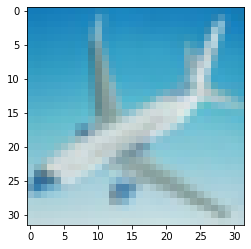

In [13]:
show_image(1701)

This image is a(n) ship.


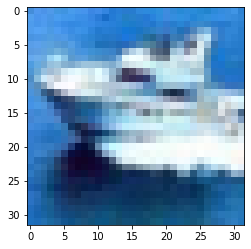

In [14]:
show_image(9154)

# Initialize settings for Neural Network

In [48]:
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        # Convolutional Layer - 
        self.conv1 = nn.Conv2d(3,6,5)
        
        # 2nd Convolutional Layer -
        self.conv2 = nn.Conv2d(6,16,5)
        
        # Max Pooling layers - 
        self.pool = nn.MaxPool2d(2,2)
             
        # 3 fully connected layers
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        #Dropout for regularization using default p=0.5
        #self.dr1 = nn.Dropout2d()
        #self.dr2 = nn.Dropout()
        
        # Activation function
        self.activ1 = nn.ReLU()
        #self.activ1 = nn.Tanh()
        #self.activ2 = nn.LocalResponseNorm(2)
        
    def forward(self, x):
        # 2 convolutional / pooling layers
        x = self.activ1(self.conv1(x))
        x = self.pool(x)
        x = self.activ1(self.conv2(x))
        x = self.pool(x)
        
        # 2 fully connected hidden layers
        x = x.view(-1,16*5*5)
        x = self.activ1(self.fc1(x))
        x = self.activ1(self.fc2(x))
        
        # final output layer
        x = self.fc3(x)
        
        return x

In [95]:
class Neural_Network2(nn.Module):
    def __init__(self):
        super(Neural_Network2, self).__init__()
        # Convolutional Layer - 
        self.conv1 = nn.Conv2d(3,6,3)
        
        # 2nd Convolutional Layer -
        self.conv2 = nn.Conv2d(6,6,5)
        
        # 3rd Convolutional Layer -
        self.conv3 = nn.Conv2d(6,8,5)
        
        # 4th Convolutional Layer
        self.conv4 = nn.Conv2d(8,10,5)
        
        # Max Pooling layers - 
        self.pool = nn.MaxPool2d(2,2)
             
        # 3 fully connected layers
        self.fc1 = nn.Linear(40, 10)
        
        # Activation function
        self.activ1 = nn.ReLU()
        
    def forward(self, x):
        # 2 convolutional / pooling layers
        x = self.activ1(self.conv1(x))
        x = self.activ1(self.conv2(x))
        x = self.pool(x)
        x = self.activ1(self.conv3(x))
        x = self.activ1(self.conv4(x))
        x = self.pool(x)
        
        # 2 fully connected hidden layers
        x = x.view(-1,40)
        x = self.activ1(self.fc1(x))
        
        return x

In [77]:
class Neural_Network_Linear(nn.Module)
     def __init__(self):
        super(Neural_Network, self).__init__()
        self.fc1 = nn.Linear(32* 32 * 3, 256)
        self.fc2 = nn.Linear(256,200)
        self.fc3 = nn.Linear(200, 10)
        self.activ = nn.functional.relu
        
    def forward(self, x):
        x = self.activ(self.fc1(x))
        x = self.activ(self.fc2(x))
        x = self.fc3(x)
        
        return x

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

class Neural_Network2(nn.Module):
    def __init__(self):
        super(Neural_Network2, self).__init__()
        # Convolutional Layer - 
        self.conv1 = nn.Conv2d(3,6,5)
        
        # 2nd Convolutional Layer -
        self.conv2 = nn.Conv2d(6,16,3)
        
        # Max Pooling layer - 
        self.pool = nn.MaxPool2d(2,2)
        
        
        # 3 fully connected layers
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        self.fc4 = nn.Linear(42, 21)
        self.fc5 = nn.Linear(21, 10)
        
        #Dropout for regularization using default p=0.5
        self.dr1 = nn.Dropout2d()
        self.dr2 = nn.Dropout()
        
        # Activation function
        #self.activ = nn.functional.relu
        #self.activ = nn.functional.leaky_relu
        self.activ = nn.Tanh()
        
    def forward(self, x):
        # 2 convolutional / pooling layers
        x = self.pool(self.activ(self.conv1(x)))
        x = self.pool(self.activ(self.conv2(x)))
        
        # 2 fully connected hidden layers, with dropout in between
        x = x.view(-1,16*7*7)
        x = self.activ(self.fc1(x))
        x = self.dr2(x)
        x = self.activ(self.fc2(x))
        x = self.dr2(x)
        x = self.activ(self.fc3(x))
        x = self.dr2(x)
        x = self.activ(self.fc4(x))
        x = self.dr2(x)
        
        # final fully connected hidden layer
        x = self.fc5(x)
        
        return x

## Function to calculate classification prediction accuracy

In [16]:
def accuracy(outputs, labels):
    prediction = outputs.max(1, keepdim=True)[1].squeeze()
    prediction_comp = torch.eq(prediction, labels)
    prediction_comp = prediction_comp.sum().numpy() / torch.numel(prediction)
    return prediction_comp * 100

In [102]:
neural_network = Neural_Network2()
neural_network

Neural_Network2(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(6, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=40, out_features=10, bias=True)
  (activ1): ReLU()
)

In [103]:
criterion = nn.CrossEntropyLoss()
number_of_epochs = 100
step_size = 0.01
momentum_parameter = 0.9
optimiser = optim.SGD(neural_network.parameters(), lr=step_size, momentum=momentum_parameter)

running_loss = []
running_val_loss = []
running_training_accuracy = []
running_training_accuracy.append(0)
running_val_accuracy = []
running_val_accuracy.append(0)

print("Log -- Step size: {}, Momentum: {}, batch_size = {}".format(step_size,momentum_parameter,train_batch_size))
# loop for epochs
for k in range(number_of_epochs):
    epoch_loss = 0
    training_accuracy = 0
    
    #if k > 15:
     #   step_size = 0.01
      #  optimiser = optim.SGD(neural_network.parameters(), lr=step_size, momentum=momentum_parameter)
    
    for j, (images, labels) in enumerate(train_loader):
        optimiser.zero_grad()
        outputs = neural_network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()
        
        epoch_loss += loss.item()
        training_accuracy += accuracy(outputs, labels)
    
    running_loss.append(epoch_loss/len(train_loader))
    running_training_accuracy.append(training_accuracy/len(train_loader))
    
    val_images, val_labels = iter(val_loader).next()
    val_outputs = neural_network(val_images)
    val_loss = criterion(val_outputs, val_labels).item()
    running_val_loss.append(val_loss)
    val_accuracy = accuracy(val_outputs, val_labels)
    running_val_accuracy.append(val_accuracy)
    
    if k % 1 == 0:
        print("Epoch {a}/{b} -> Tr. Loss = {c:.2f}, Val. Loss = {d:.2f}, Tr. Acc = {e:.2f}, Val. Acc = {f:.2f}".format(a=k, b=number_of_epochs, c=running_loss[-1], d=running_val_loss[-1], e=running_training_accuracy[-1], f=running_val_accuracy[-1]))
    
    #if (len(running_val_loss) > 3) and (running_val_loss[-3] - running_val_loss[-1] < 0):
        #break
        
print("Final Epoch {} -> Loss = {}".format(k, running_loss[-1]))

Log -- Step size: 0.01, Momentum: 0.9, batch_size = 256
Epoch 0/100 -> Tr. Loss = 2.28, Val. Loss = 2.18, Tr. Acc = 13.45, Val. Acc = 20.40
Epoch 1/100 -> Tr. Loss = 2.00, Val. Loss = 1.86, Tr. Acc = 28.73, Val. Acc = 35.66
Epoch 2/100 -> Tr. Loss = 1.81, Val. Loss = 1.77, Tr. Acc = 37.94, Val. Acc = 40.50
Epoch 3/100 -> Tr. Loss = 1.70, Val. Loss = 1.64, Tr. Acc = 41.17, Val. Acc = 43.88
Epoch 4/100 -> Tr. Loss = 1.61, Val. Loss = 1.56, Tr. Acc = 44.81, Val. Acc = 46.40
Epoch 5/100 -> Tr. Loss = 1.56, Val. Loss = 1.55, Tr. Acc = 46.70, Val. Acc = 47.30
Epoch 6/100 -> Tr. Loss = 1.52, Val. Loss = 1.50, Tr. Acc = 48.23, Val. Acc = 48.72
Epoch 7/100 -> Tr. Loss = 1.48, Val. Loss = 1.45, Tr. Acc = 49.65, Val. Acc = 50.90
Epoch 8/100 -> Tr. Loss = 1.45, Val. Loss = 1.44, Tr. Acc = 51.14, Val. Acc = 51.78
Epoch 9/100 -> Tr. Loss = 1.43, Val. Loss = 1.43, Tr. Acc = 52.04, Val. Acc = 51.66
Epoch 10/100 -> Tr. Loss = 1.41, Val. Loss = 1.41, Tr. Acc = 52.66, Val. Acc = 52.18
Epoch 11/100 -> Tr.

KeyboardInterrupt: 

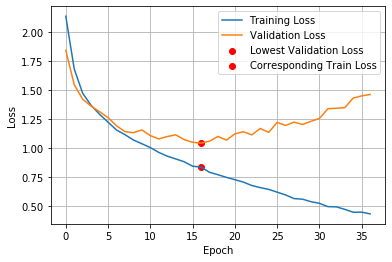

In [51]:
plt.plot(running_loss, label="Training Loss")
plt.plot(running_val_loss, label="Validation Loss")
for i in range(len(running_val_loss)):
    if running_val_loss[i] == np.min(running_val_loss):
        lowest_index = i
plt.scatter(lowest_index, running_val_loss[lowest_index], label="Lowest Validation Loss", c="r")
plt.scatter(lowest_index, running_loss[lowest_index], label="Corresponding Train Loss", c="r")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid()
plt.show()

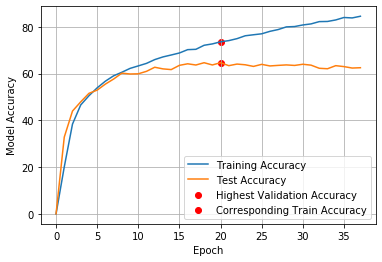

In [52]:
plt.plot(running_training_accuracy, label="Training Accuracy")
plt.plot(running_val_accuracy, label="Test Accuracy")
for i in range(len(running_val_accuracy)):
    if running_val_accuracy[i] == np.max(running_val_accuracy):
        highest_index = i
plt.scatter(highest_index, running_val_accuracy[highest_index], label="Highest Validation Accuracy", c="r")
plt.scatter(highest_index, running_training_accuracy[highest_index], label="Corresponding Train Accuracy", c="r")
plt.legend()
plt.ylabel("Model Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.show()

In [53]:
neural_network.eval()
test_images, test_labels = iter(test_loader).next()
test_outputs = neural_network(test_images)
test_loss = criterion(test_outputs, test_labels).item()
test_accuracy = accuracy(test_outputs, test_labels)
print("Test Loss is : {a:.2f}".format(a=test_loss))
print("Test Accuracy is : {a:.2f}%".format(a=test_accuracy))

Test Loss is : 1.54
Test Accuracy is : 62.83%


In [56]:
model = neural_network
torch.save(model.state_dict(), "Conv-NN-Relu-256batch-0.01step")

In [ ]:
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()

In [103]:
print(neural_network.)

<bound method Module.parameters of Neural_Network(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6144, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
  (dr1): Dropout2d(p=0.5, inplace=False)
  (dr2): Dropout(p=0.5, inplace=False)
  (activ2): LocalResponseNorm(2, alpha=0.0001, beta=0.75, k=1.0)
)>
